# Business Understanding
Hacer un portafolio de inversión requiere de revisar las metodologías existentes. Para este ejercicio mostraré 2 metodologías, el modelo de Markowitz y el modelo Kelly Criterion. Si me dio tiempo, estaría mostrando el modelo CAPM.

# Data Aquisition and Understanding
¿Alguna vez has visitado Yahoo Finance? Es un lugar obligado para obtener datos de stocks!. Y los datos pueden ser consumidos usando Python.

In [1]:
!pip install yfinance

In [2]:
!pip install forex_python

In [3]:
import math
import numpy as np
import pandas as pd
import yfinance as yf
from forex_python.converter import CurrencyRates
from datetime import datetime

Vamos a mantenerlo sencillo. Necesitamos los precios de cierre de los stocks, y por supuesto, unos stocks! Si buscas rápido en [https://bing.com](bing.com) por el texto "***top stocks june 2024***" encontrarás entradas interesantes como esta [https://www.forbes.com/advisor/investing/best-stocks-to-buy-now/].

Ahora, vamos a traer los datos de los stocks a unos data frames. Vamos a practicar Python e inglés al mismo tiempo! 

In [4]:
portfolio = ['CRWD', 'PLTR', 'EQT', 'AVGO', 'UBER', 'CRM', 'MNDY', 'MSFT', 'NVDA']

In [5]:
stock_prices = pd.DataFrame()
stock_returns = pd.DataFrame()
stock_adjclose = pd.DataFrame()
mcaps = {}

# Get today's date
today_date = datetime.now()
# Convert the date to a string
end = today_date.strftime('%Y-%m-%d')

# For each stock in the portfolio, it adds the closure value and calculates the returns percentage (+/-)
for x in portfolio:
    stock = yf.Ticker(x)
    close_price = stock.history(start='2022-01-01', end=end)['Close']
    mcaps[x] = stock.info["marketCap"]

    # Concats each stock as a new column
    stock_prices = pd.concat([stock_prices, close_price], axis=1)

    # Calculates percent return compared with the previous close and adds it as a new column for each stock
    stock_returns = pd.concat([stock_returns, close_price.pct_change()], axis=1)

# Each column has the stock name
stock_prices.columns = portfolio
stock_returns.columns = portfolio

# Lets drop NAs
stock_prices = stock_prices.dropna()
stock_returns = stock_returns.dropna()

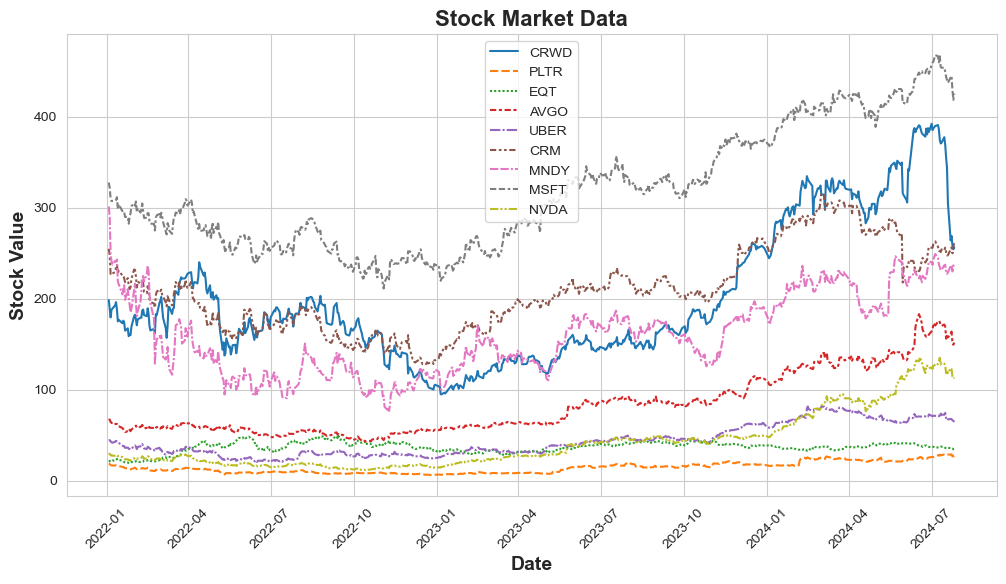

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size for better readability
plt.figure(figsize=(12, 6))  # Width, height in inches

# Set the style of seaborn for a cleaner look
sns.set_style('whitegrid')

# Plot using seaborn with more readable formatting
sns.lineplot(data=stock_prices)

# Enhance the readability of the plot
plt.xticks(rotation=45)  # Rotate date labels
plt.xlabel('Date', fontsize=14, fontweight='bold')  # Bolder and larger x-axis label
plt.ylabel('Stock Value', fontsize=14, fontweight='bold')  # Bolder and larger y-axis label
plt.title('Stock Market Data', fontsize=16, fontweight='bold')  # Bolder and larger title

# Show the plot
plt.show()

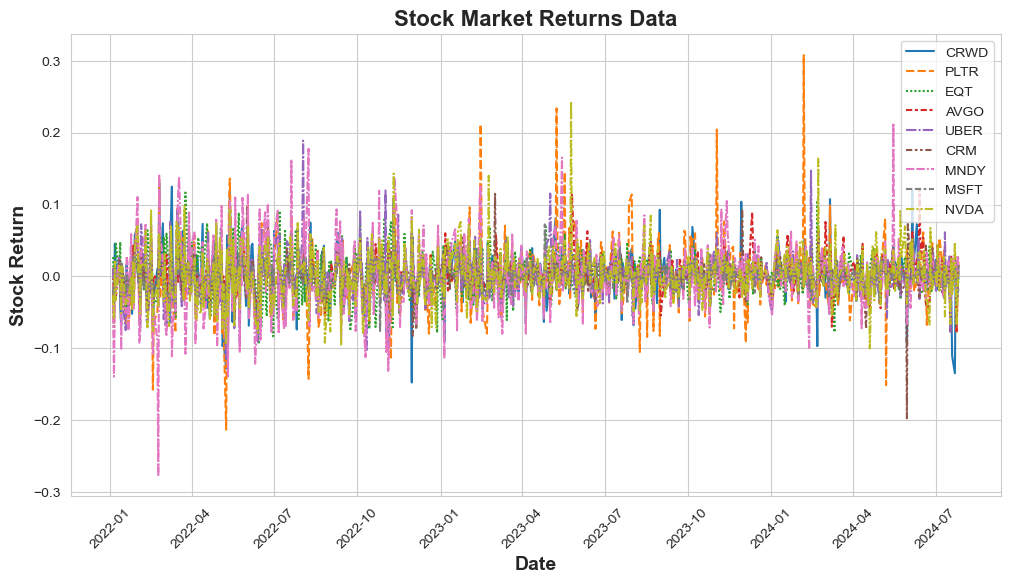

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size for better readability
plt.figure(figsize=(12, 6))  # Width, height in inches

# Set the style of seaborn for a cleaner look
sns.set_style('whitegrid')

# Plot using seaborn with more readable formatting
sns.lineplot(data=stock_returns)

# Enhance the readability of the plot
plt.xticks(rotation=45)  # Rotate date labels
plt.xlabel('Date', fontsize=14, fontweight='bold')  # Bolder and larger x-axis label
plt.ylabel('Stock Return', fontsize=14, fontweight='bold')  # Bolder and larger y-axis label
plt.title('Stock Market Returns Data', fontsize=16, fontweight='bold')  # Bolder and larger title

# Show the plot
plt.show()

In [8]:
expected_stock_returns = []
individual_stock_risk = []

for x, y in stock_returns.items():
    # Mean of returns for each stock
    expected_stock_returns.append(y.mean())

    # Std. Dev. of returns for each stock
    individual_stock_risk.append(y.std())

In [9]:
print(f"Mean return (percent)")

for name, value in zip(stock_prices, expected_stock_returns):
    print(f"\t{name}: \t{value * 100}")

Mean return (percent)
	CRWD: 	0.09841883505747194
	PLTR: 	0.1539375949746799
	EQT: 	0.11735892278947184
	AVGO: 	0.1556177891766341
	UBER: 	0.10718496019412682
	CRM: 	0.035962708391917765
	MNDY: 	0.071058796707884
	MSFT: 	0.056882136211022644
	NVDA: 	0.26687060273605245


In [10]:
print(f"Risk (Std. Dev)")

for name, value in zip(stock_prices, individual_stock_risk):
    print(f"\t{name}: \t ±{value}")


Risk (Std. Dev)
	CRWD: 	 ±0.03416749417657323
	PLTR: 	 ±0.043880982598795214
	EQT: 	 ±0.02850600844197497
	AVGO: 	 ±0.023341054397168902
	UBER: 	 ±0.031084803314580717
	CRM: 	 ±0.02484511671679352
	MNDY: 	 ±0.04634554632992047
	MSFT: 	 ±0.018055608531574303
	NVDA: 	 ±0.03516313459149571


In [11]:
# Vectorization
expected_stock_returns = np.array(pd.DataFrame(expected_stock_returns))

# Vectorization
individual_stock_risk = np.array(pd.DataFrame(individual_stock_risk))

# Covariance matrix of "Percent change per stock"
stock_returns_cov_matrix = np.array(stock_returns.cov())

In [12]:
stock_returns_cov_matrix

array([[1.16741766e-03, 8.22741299e-04, 1.55710950e-04, 3.51532133e-04,
        5.04194551e-04, 4.77595412e-04, 8.93199055e-04, 3.21501590e-04,
        6.22430411e-04],
       [8.22741299e-04, 1.92554063e-03, 2.16325571e-04, 4.24714965e-04,
        7.03248238e-04, 4.94372688e-04, 1.09000155e-03, 3.63988289e-04,
        7.90830834e-04],
       [1.55710950e-04, 2.16325571e-04, 8.12592517e-04, 1.38755060e-04,
        1.27689246e-04, 1.55879344e-04, 1.30358282e-04, 9.21771792e-05,
        2.04115014e-04],
       [3.51532133e-04, 4.24714965e-04, 1.38755060e-04, 5.44804820e-04,
        2.81688265e-04, 2.70484629e-04, 4.23105118e-04, 2.44834304e-04,
        5.66723479e-04],
       [5.04194551e-04, 7.03248238e-04, 1.27689246e-04, 2.81688265e-04,
        9.66264997e-04, 3.87759917e-04, 7.29175735e-04, 2.45046070e-04,
        5.27535697e-04],
       [4.77595412e-04, 4.94372688e-04, 1.55879344e-04, 2.70484629e-04,
        3.87759917e-04, 6.17279825e-04, 6.50033854e-04, 2.72103227e-04,
        4.5

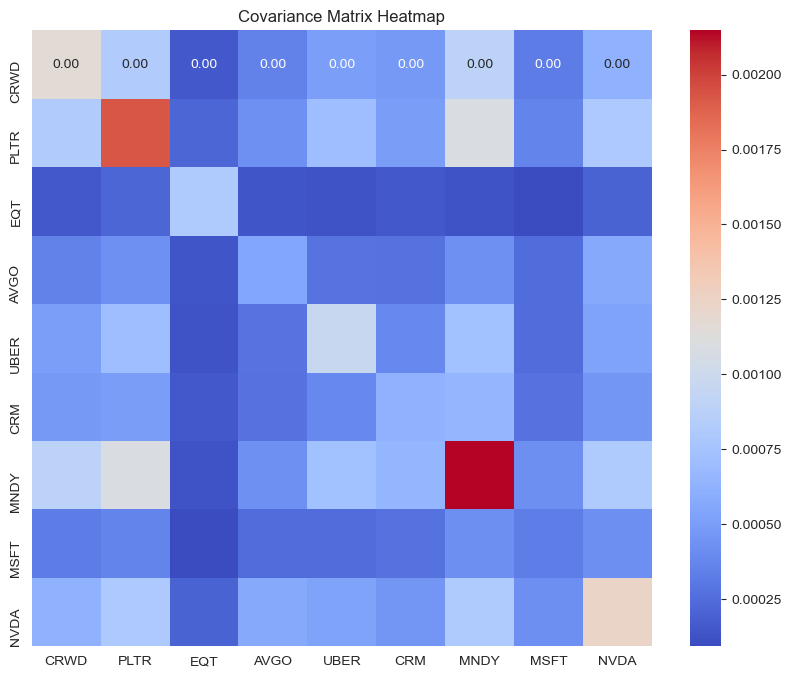

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'stock_returns' is your DataFrame with stock return data
# Calculate the covariance matrix using Pandas
cov_matrix_df = stock_returns.cov()

# Set the figure size
plt.figure(figsize=(10, 8))

# Create a heatmap using seaborn
sns.heatmap(cov_matrix_df, annot=True, fmt='.2f', cmap='coolwarm')

# Add title
plt.title('Covariance Matrix Heatmap')

# Show the plot
plt.show()

In [14]:
cov_matrix_df

,CRWD,PLTR,EQT,AVGO,UBER,CRM,MNDY,MSFT,NVDA
CRWD,0.001167,0.000823,0.000156,0.000352,0.000504,0.000478,0.000893,0.000322,0.000622
PLTR,0.000823,0.001926,0.000216,0.000425,0.000703,0.000494,0.001090,0.000364,0.000791
EQT,0.000156,0.000216,0.000813,0.000139,0.000128,0.000156,0.000130,0.000092,0.000204
AVGO,0.000352,0.000425,0.000139,0.000545,0.000282,0.000270,0.000423,0.000245,0.000567
UBER,0.000504,0.000703,0.000128,0.000282,0.000966,0.000388,0.000729,0.000245,0.000528
CRM,0.000478,0.000494,0.000156,0.000270,0.000388,0.000617,0.000650,0.000272,0.000458
MNDY,0.000893,0.001090,0.000130,0.000423,0.000729,0.000650,0.002148,0.000417,0.000814
MSFT,0.000322,0.000364,0.000092,0.000245,0.000245,0.000272,0.000417,0.000326,0.000420
NVDA,0.000622,0.000791,0.000204,0.000567,0.000528,0.000458,0.000814,0.000420,0.001236


¿Y qué buscamos?. ¿Crecimiento en tandem o independencia entre stocks?. Es una pregunta difícil, quizá estén cómodos con un mix. Es decir, que stocks con alto retorno se relacione con otros, esto trae mayor riesgo pero ahí pueden estar las ganancias. Por supuesto queremos evitar stocks con covarianza negativa. Quizá también queremos tener stocks cuya correlación es cerca a 0 y que presentan un alto retorno, !grandes ganancias y mejor diversificación¡
No es una tarea fácil. Aquí es donde aplicar el modelo de Markowitz será de utilidad.

**Nota**: Sólo se consideraron datos desde 2021-01-01. ¿Cuál es el motivo?. Qué las restricciones de la pandemia se relajaron en este punto y el comportamiento de los mercados tiene una tendencia más clara desde ese día.

# Modeling
Para automatizar la toma de decisiones tendremos que usar alguna librería que realice la optimización. Dicha optimización minimizará la volatilidad a partir de la covarianza maximizando los retornos. Usaremos `PyPortfolioOpt`.

## Modelo de Markowitz
Este modelo es un clásico dentro de la teoría de optimización de portafolios. Se basa en la premisa de que los retornos (en mi caso, retornos de stocks) vienen de una distribución normal. Muchos papers nos han dejado ver que en realidad en las colas tenemos eventos que no son para nada raros y que, por lo mismo, no cumplen las características de la distribución normal.

Aún así, es un buen punto inicial. ¿Acaso la regresión no genera los primeros modelos base que usamos luego para comparación con modelos más elaborados?. 

Según Kanungo, D. K.(2023), el propio Harry Markowitz (finado en 2023) no usaba su propio modelo. Por dicho modelo fue merecedor de el **John von Neumann Theory Prize** en 1989 y el premio **Nobel** en 1990.

In [15]:
!pip install pyportfolioopt

In [16]:
from pypfopt.efficient_frontier import EfficientFrontier

ef = EfficientFrontier(expected_stock_returns, stock_returns_cov_matrix, weight_bounds=(0,1))

In [17]:
?ef

Type:           EfficientFrontier
String form:    <pypfopt.efficient_frontier.efficient_frontier.EfficientFrontier object at 0x0000017746BEB8D0>
File:           c:\users\imedi\anaconda3\envs\datapub202406\lib\site-packages\pypfopt\efficient_frontier\efficient_frontier.py
Docstring:     
An EfficientFrontier object (inheriting from BaseConvexOptimizer) contains multiple
optimization methods that can be called (corresponding to different objective
functions) with various parameters. Note: a new EfficientFrontier object should
be instantiated if you want to make any change to objectives/constraints/bounds/parameters.

Instance variables:

- Inputs:

    - ``n_assets`` - int
    - ``tickers`` - str list
    - ``bounds`` - float tuple OR (float tuple) list
    - ``cov_matrix`` - np.ndarray
    - ``expected_returns`` - np.ndarray
    - ``solver`` - str
    - ``solver_options`` - {str: str} dict

- Output: ``weights`` - np.ndarray

Public methods:

- ``min_volatility()`` optimizes for minimum

In [18]:
ratios_min_volatility = ef.min_volatility()

In [19]:
cleaned_ratios = pd.Series(ratios_min_volatility)
cleaned_ratios.index = portfolio

cleaned_ratios

CRWD    0.000000
PLTR    0.000000
EQT     0.220491
AVGO    0.120055
UBER    0.045453
CRM     0.023764
MNDY    0.000000
MSFT    0.590237
NVDA    0.000000
dtype: float64

In [20]:
optimal_portfolio = np.expand_dims(cleaned_ratios, axis=0)
optimal_portfolio

array([[0.        , 0.        , 0.22049125, 0.12005466, 0.04545344,
        0.02376395, 0.        , 0.5902367 , 0.        ]])

In [21]:
# Expected return with the optimal solution
opt_portfolio_expected_return = np.matmul(optimal_portfolio, expected_stock_returns)
opt_portfolio_expected_return

array([[0.0008386]])

In [22]:
# Std. Dev. for the optimal solution
opt_portfolio_var = np.matmul(optimal_portfolio, \
                          np.matmul(stock_returns_cov_matrix, optimal_portfolio.transpose()))
opt_portfolio_var

array([[0.00025974]])

In [23]:
opt_portfolio_risk = math.sqrt(opt_portfolio_var)
opt_portfolio_risk

C:\Users\imedi\AppData\Local\Temp\ipykernel_10096\3615998991.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  opt_portfolio_risk = math.sqrt(opt_portfolio_var)


0.016116522884481704

In [24]:
mxn_investment_amount = 23000.00
mxn_to_usd_exchange_rate = 17.70

In [25]:
usd_investment_amount = mxn_investment_amount / mxn_to_usd_exchange_rate

# Final report:
print(f'Optimal Markowitz Portfolio (MXN amount: {mxn_investment_amount}. USD amount: {usd_investment_amount}):')
print(f'   -Expected earns (daily): {opt_portfolio_expected_return[0][0]*100:.2f}%.')
print(f'\tExpected amount (Yearly): ${usd_investment_amount*opt_portfolio_expected_return[0][0]*52*5:.2f}')
print(f'   -Variance: +/-{opt_portfolio_var[0][0]*100:.2f}%')
print(f'\tExpected variance amount (Yearly): +/-${usd_investment_amount*opt_portfolio_var[0][0]*52*5:.2f}')
print(f'   -Risk: {opt_portfolio_risk*100:.2f}%')
print('   -Portfolio composition:')
for symbol, percentage in cleaned_ratios.sort_values(ascending= False).items():
    print(f'\tStock: {symbol}. \tPercentage: {percentage*100:.2f}%.\tAmount: ${percentage * usd_investment_amount:.2f}.')


Optimal Markowitz Portfolio (MXN amount: 23000.0. USD amount: 1299.4350282485875):
   -Expected earns (daily): 0.08%.
	Expected amount (Yearly): $283.32
   -Variance: +/-0.03%
	Expected variance amount (Yearly): +/-$87.75
   -Risk: 1.61%
   -Portfolio composition:
	Stock: MSFT. 	Percentage: 59.02%.	Amount: $766.97.
	Stock: EQT. 	Percentage: 22.05%.	Amount: $286.51.
	Stock: AVGO. 	Percentage: 12.01%.	Amount: $156.00.
	Stock: UBER. 	Percentage: 4.55%.	Amount: $59.06.
	Stock: CRM. 	Percentage: 2.38%.	Amount: $30.88.
	Stock: CRWD. 	Percentage: 0.00%.	Amount: $0.00.
	Stock: PLTR. 	Percentage: 0.00%.	Amount: $0.00.
	Stock: MNDY. 	Percentage: 0.00%.	Amount: $0.00.
	Stock: NVDA. 	Percentage: 0.00%.	Amount: $0.00.


## Modelo Kelly Criterion

Este modelo, también llamado "algoritmo de de crecimiento óptimo de capital" fue publicado en 1956 por John Kelly. Su efectividad está mas bien en el corto plazo minimizando la ruina financiera. Este modelo sobre simplifíca los mercados.

In [26]:
stock_prices

,CRWD,PLTR,EQT,AVGO,UBER,CRM,MNDY,MSFT,NVDA
2022-01-03 00:00:00-05:00,198.330002,18.530001,20.937536,66.332001,43.950001,254.730225,301.209991,327.530090,30.075628
2022-01-04 00:00:00-05:00,189.190002,18.170000,21.503672,67.092003,44.419998,247.520859,289.260010,321.913879,29.245888
2022-01-05 00:00:00-05:00,179.289993,16.959999,20.812792,64.300003,43.240002,227.019608,249.000000,309.556305,27.562424
2022-01-06 00:00:00-05:00,187.490005,16.740000,20.899151,63.702999,42.029999,228.495377,241.100006,307.110229,28.135559
2022-01-07 00:00:00-05:00,188.990005,16.559999,21.887497,61.915001,41.509998,227.657776,237.380005,307.266815,27.205961
...,...,...,...,...,...,...,...,...,...
2024-07-22 00:00:00-04:00,263.910004,28.459999,35.669998,161.059998,67.730003,254.080002,235.639999,442.940002,123.540001
2024-07-23 00:00:00-04:00,268.880005,28.809999,35.049999,163.770004,67.519997,256.059998,236.490005,444.850006,122.589996
2024-07-24 00:00:00-04:00,258.140015,26.600000,35.099998,151.339996,66.139999,249.779999,229.839996,428.899994,114.250000
2024-07-25 00:00:00-04:00,254.149994,26.629999,34.380001,149.259995,65.739998,256.519989,236.100006,418.399994,112.279999


In [27]:
!pip install pyomo

Es necesario instalar el solver `ipopt`. En un Linux esto se haría con los siguientes comandos.

!wget -N -q "https://matematica.unipv.it/gualandi/solvers/ipopt-linux64.zip" \
!mv ipopt-linux64.zip ../ipopt \
!ls ../ipopt \
cd stock_portfolio_optimization/ \
cd ipopt/ \
unzip -o -q ipopt-linux64 \
ls

En Windows. Descarguen el folder https://www.coin-or.org/download/binary/Ipopt/ y copie el contenido del zip póngalo en la carpeta ipopt.

In [28]:
from pyomo.environ import *

In [29]:
## It is convenient to change the the stock_price dataframe for further processing. A multilevel column hierarchy is the first step to execute
stock_prices.columns = [list(stock_prices.columns), ['Close'] * len(stock_prices.columns)]
stock_prices.columns.names = ['Ticker', 'Price']

In [30]:
stock_prices.head()

Ticker,CRWD,PLTR,EQT,AVGO,UBER,CRM,MNDY,MSFT,NVDA
Price,Close,Close,Close,Close,Close,Close,Close,Close,Close
2022-01-03 00:00:00-05:00,198.330002,18.530001,20.937536,66.332001,43.950001,254.730225,301.209991,327.530090,30.075628
2022-01-04 00:00:00-05:00,189.190002,18.170000,21.503672,67.092003,44.419998,247.520859,289.260010,321.913879,29.245888
2022-01-05 00:00:00-05:00,179.289993,16.959999,20.812792,64.300003,43.240002,227.019608,249.000000,309.556305,27.562424
2022-01-06 00:00:00-05:00,187.490005,16.740000,20.899151,63.702999,42.029999,228.495377,241.100006,307.110229,28.135559
2022-01-07 00:00:00-05:00,188.990005,16.559999,21.887497,61.915001,41.509998,227.657776,237.380005,307.266815,27.205961


In [31]:
## Lets calculate the percentage difference for every close
returns = stock_prices.loc[:, (slice(None), 'Close')] / stock_prices.loc[:, (slice(None), 'Close')].shift(1)
returns = returns.rename(columns={'Close': 'returns'})

In [32]:
returns.head()

Ticker,CRWD,PLTR,EQT,AVGO,UBER,CRM,MNDY,MSFT,NVDA
Price,returns,returns,returns,returns,returns,returns,returns,returns,returns
2022-01-03 00:00:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-04 00:00:00-05:00,0.953915,0.980572,1.027039,1.011458,1.010694,0.971698,0.960327,0.982853,0.972412
2022-01-05 00:00:00-05:00,0.947672,0.933407,0.967872,0.958386,0.973435,0.917174,0.860817,0.961612,0.942438
2022-01-06 00:00:00-05:00,1.045736,0.987028,1.004149,0.990715,0.972017,1.006501,0.968273,0.992098,1.020794
2022-01-07 00:00:00-05:00,1.008000,0.989247,1.047291,0.971932,0.987628,0.996334,0.984571,1.000510,0.966960


In [33]:
lookback = 52 * 5 ## 52 weeks a year, 5 days a week

In [34]:
## This will calculate the rolling means for a year cycle
means = returns.rolling(lookback).mean().rename(columns={'returns': 'mean'})

In [35]:
means.tail()

Ticker,CRWD,PLTR,EQT,AVGO,UBER,CRM,MNDY,MSFT,NVDA
Price,mean,mean,mean,mean,mean,mean,mean,mean,mean
2024-07-22 00:00:00-04:00,1.002591,1.002931,0.999781,1.002622,1.002013,1.000927,1.001804,1.001222,1.004555
2024-07-23 00:00:00-04:00,1.002642,1.002934,0.999688,1.002667,1.001859,1.000806,1.001612,1.001231,1.004505
2024-07-24 00:00:00-04:00,1.002607,1.002615,0.999768,1.002341,1.001767,1.000606,1.001490,1.001038,1.004107
2024-07-25 00:00:00-04:00,1.002426,1.002585,0.999725,1.002286,1.001647,1.000657,1.001526,1.000882,1.003859
2024-07-26 00:00:00-04:00,1.002491,1.002742,0.999834,1.002355,1.001643,1.000767,1.001653,1.000916,1.003928


In [36]:
## This will calculate the rolling variance for a year cycle
var = returns.rolling(lookback).var().rename(columns={'returns': 'var'})

In [37]:
var.tail()

Ticker,CRWD,PLTR,EQT,AVGO,UBER,CRM,MNDY,MSFT,NVDA
Price,var,var,var,var,var,var,var,var,var
2024-07-22 00:00:00-04:00,0.000827,0.001645,0.000381,0.000577,0.000497,0.000450,0.000953,0.000161,0.000839
2024-07-23 00:00:00-04:00,0.000828,0.001645,0.000382,0.000578,0.000492,0.000444,0.000943,0.000161,0.000839
2024-07-24 00:00:00-04:00,0.000831,0.001670,0.000380,0.000601,0.000494,0.000444,0.000946,0.000166,0.000856
2024-07-25 00:00:00-04:00,0.000829,0.001670,0.000382,0.000602,0.000492,0.000446,0.000948,0.000168,0.000850
2024-07-26 00:00:00-04:00,0.000828,0.001669,0.000378,0.000603,0.000492,0.000448,0.000945,0.000168,0.000849


In [38]:
## Lets merge the dataframes together
df = pd.concat([returns, means, var], axis=1)
## Get covariance matrices and transform to 3D array
df.head()

Ticker,CRWD,PLTR,EQT,AVGO,UBER,CRM,MNDY,MSFT,NVDA,CRWD,...,NVDA,CRWD,PLTR,EQT,AVGO,UBER,CRM,MNDY,MSFT,NVDA
Price,returns,returns,returns,returns,returns,returns,returns,returns,returns,mean,...,mean,var,var,var,var,var,var,var,var,var
2022-01-03 00:00:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-04 00:00:00-05:00,0.953915,0.980572,1.027039,1.011458,1.010694,0.971698,0.960327,0.982853,0.972412,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-05 00:00:00-05:00,0.947672,0.933407,0.967872,0.958386,0.973435,0.917174,0.860817,0.961612,0.942438,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-06 00:00:00-05:00,1.045736,0.987028,1.004149,0.990715,0.972017,1.006501,0.968273,0.992098,1.020794,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-07 00:00:00-05:00,1.008000,0.989247,1.047291,0.971932,0.987628,0.996334,0.984571,1.000510,0.966960,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
n = returns.shape[1]
n

9

In [40]:
## Lets drop the "Close" level for the returns for further processing 
cov = returns.droplevel(1, axis=1)

In [41]:
cov.head()

Ticker,CRWD,PLTR,EQT,AVGO,UBER,CRM,MNDY,MSFT,NVDA
2022-01-03 00:00:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-04 00:00:00-05:00,0.953915,0.980572,1.027039,1.011458,1.010694,0.971698,0.960327,0.982853,0.972412
2022-01-05 00:00:00-05:00,0.947672,0.933407,0.967872,0.958386,0.973435,0.917174,0.860817,0.961612,0.942438
2022-01-06 00:00:00-05:00,1.045736,0.987028,1.004149,0.990715,0.972017,1.006501,0.968273,0.992098,1.020794
2022-01-07 00:00:00-05:00,1.008000,0.989247,1.047291,0.971932,0.987628,0.996334,0.984571,1.000510,0.966960


In [42]:
## Now, lets calculate the covarience each day for all stocks
cov = cov.rolling(lookback).cov()

In [43]:
cov.tail()

Ticker                                CRWD      PLTR       EQT      AVGO  \
                          Ticker                                           
2024-07-26 00:00:00-04:00 UBER    0.000203  0.000320  0.000005  0.000161   
                          CRM     0.000263  0.000197 -0.000003  0.000144   
                          MNDY    0.000379  0.000400 -0.000004  0.000257   
                          MSFT    0.000161  0.000193 -0.000011  0.000151   
                          NVDA    0.000344  0.000358 -0.000001  0.000456   

Ticker                                UBER       CRM      MNDY      MSFT  \
                          Ticker                                           
2024-07-26 00:00:00-04:00 UBER    0.000492  0.000159  0.000262  0.000101   
                          CRM     0.000159  0.000448  0.000281  0.000112   
                          MNDY    0.000262  0.000281  0.000945  0.000151   
                          MSFT    0.000101  0.000112  0.000151  0.000168   
                          NVDA    0.000200  0.000172  0.000299  0.000181   

Ticker                                NVDA  
                          Ticker            
2024-07-26 00:00:00-04:00 UBER    0.000200  
                          CRM     0.000172  
                          MNDY    0.000299  
                          MSFT    0.000181  
                          NVDA    0.000849

In [44]:
## Lets convert this dataframe to a list of lists for further processing
cov = cov.values
cov = cov.reshape(-1, n, n)

In [45]:
print(cov)

[[[            nan             nan             nan ...             nan
               nan             nan]
  [            nan             nan             nan ...             nan
               nan             nan]
  [            nan             nan             nan ...             nan
               nan             nan]
  ...
  [            nan             nan             nan ...             nan
               nan             nan]
  [            nan             nan             nan ...             nan
               nan             nan]
  [            nan             nan             nan ...             nan
               nan             nan]]

 [[            nan             nan             nan ...             nan
               nan             nan]
  [            nan             nan             nan ...             nan
               nan             nan]
  [            nan             nan             nan ...             nan
               nan             nan]
  ...
  [            nan     

In [46]:
fracs = np.zeros((df.shape[0], n))

In [47]:
fracs

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [48]:
fracs[:] = np.nan

In [49]:
fracs

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [50]:
g = np.zeros(df.shape[0])
g[:] = np.nan

In [51]:
g

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, na

### La implementación de un modelo de optimización por *Kelly fraction*
No hay que inventar el hilo negro. Cuando busqué una implementación me encontré un gran trabajo en Raposa (2022), el cual debería leer para tener más detalles. En dicho sitio se describe la función **Kelly fraction** y su conveniencia para la optimización en problemas de valores continuos. Nótese que de igual forma, se asume normalidad en los datos que modelan la función.

In [52]:
## Te function requires the means vector, the covariance matrix and the return free-risk. This RFR can be CETE, what you think about them?
def buildKCOptModel(returns: np.array, varcov: np.matrix, 
                    rfr: float = 0):
    assert returns.shape[0] == varcov.shape[0]
    assert returns.shape[0] == varcov.shape[1]
    
    m = ConcreteModel()
    
    # Indices. Yes, this is to iterate the i-th element 
    m.i = RangeSet(0, returns.shape[0] - 1)
    
    # Decision variables. Yes, this will be useful later to set the constraint for $f_i \le 1$
    m.f = Var(m.i, domain=UnitInterval)
    
    # Parameters
    ## This is \mu
    m.mu = Param(m.i, 
               initialize={i: m for i, m in zip(m.i, returns)})
    ## This is \sigma
    m.sigma = Param(m.i, m.i, 
                  initialize={(i, j): varcov[i, j] 
                              for i in m.i 
                              for j in m.i})
    
    # Constraints
    ## This is \sum_{i=1}^n{f_i} \le 1}
    @m.Constraint()
    def fullyInvestedConstraint(m):
        return sum(m.f[i] for i in m.i) == 1
    
    # Objective
    ## This is the huge formula, yes, that large one.
    @m.Objective(sense=maximize)
    def objective(m):
        return (rfr + sum(m.f[i] * (m.mu[i] - rfr) for i in m.i) - \
            sum(
                sum(m.f[i] * m.sigma[i, j] * m.f[j] for j in m.i)
            for i in m.i) / 2)
    
    return m

In [53]:
## Lets calculate the means and the variances for every single day after the lookback
rfr = 0 ## Assuming no CETES.

## Lets calculate the optimized f for each day from the lookback
for i, (ts, row) in enumerate(df.iterrows()):
    if i < lookback:
        continue
        
    means = row.loc[(slice(None), 'mean')].values
    var = row.loc[(slice(None), 'var')].values

    varcov = cov[i]
    ## The covariance for each stock is the variance on its diagonal
    np.fill_diagonal(varcov, var)

    ## Kelly criterion is built on top of an optimization model. Dig into the model function. 
    model = buildKCOptModel(means, varcov, rfr)
    ## Lets maximize the returns
    results = SolverFactory('../ipopt/bin/ipopt.exe').solve(model)

    ## The optimal fractions colected for f function 
    fracs[i] = np.array([model.f[j].value for j in model.f])

    ## The expected growth rate after model optimization
    g[i] = model.objective.expr()
    
df_fracs = pd.DataFrame(fracs, columns=returns.columns, 
                      index=returns.index).rename(
                          columns={'returns': 'fraction'})
df_g = pd.DataFrame(g, index=returns.index)
df_g.columns = pd.MultiIndex.from_arrays(
  [['g'], ['g']])

optimized_portfolio = pd.concat([returns, df, df_fracs, df_g], axis=1)

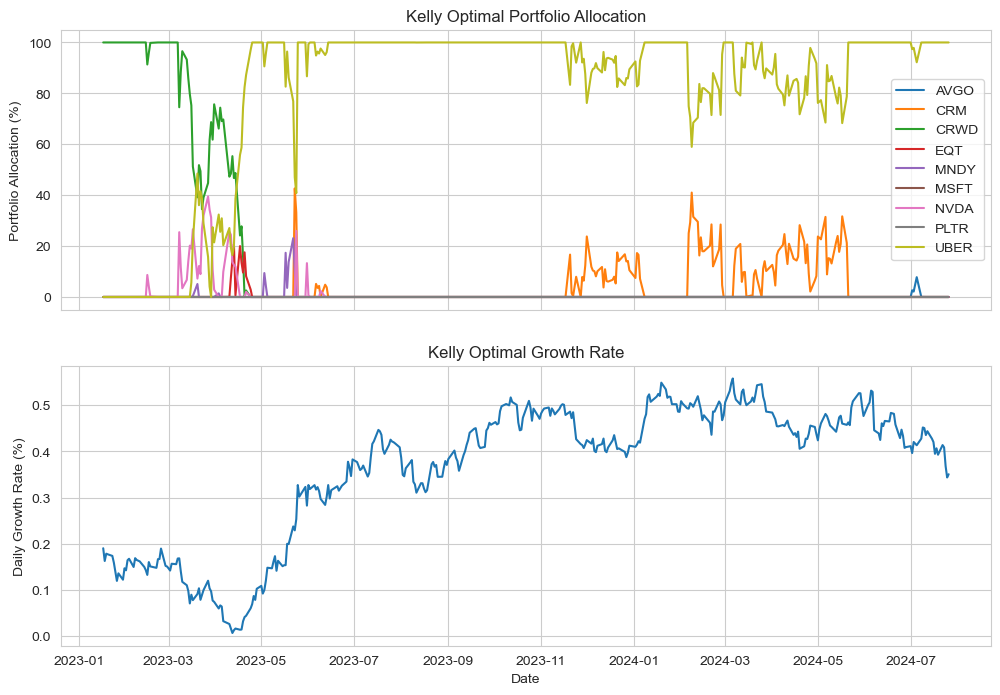

In [54]:
fig, ax = plt.subplots(2, figsize=(12, 8), sharex=True)

ax[0].plot(optimized_portfolio.loc[:, (slice(None), 'fraction')] * 100)
ax[0].set_ylabel('Portfolio Allocation (%)')
ax[0].set_title('Kelly Optimal Portfolio Allocation')
labels = [i for i in list(optimized_portfolio.columns.levels[0]) if i in portfolio]
ax[0].legend(labels=labels)

ax[1].plot((optimized_portfolio.loc[:, 'g'] - 1) * 100)

ax[1].set_xlabel('Date')
ax[1].set_ylabel('Daily Growth Rate (%)')
ax[1].set_title('Kelly Optimal Growth Rate')

plt.show()

In [55]:
usd_investment_amount = mxn_investment_amount / mxn_to_usd_exchange_rate

mean_kelly =  (optimized_portfolio.loc[:, 'g'] - 1).mean()['g'] 
stdev_kelly =  (optimized_portfolio.loc[:, 'g'] - 1).std()['g']
df_portfolio = optimized_portfolio.loc[:, (slice(None), 'fraction')]

# Final report:
print(f'Kelly Criterion Portfolio (MXN amount: {mxn_investment_amount}. USD amount: {usd_investment_amount}):')
print(f'   -Expected earns (daily): {mean_kelly * 100:.2f}%.')
print(f'\tExpected amount (Yearly): ${usd_investment_amount*mean_kelly*52*5:.2f}')
print(f'   -Variance: +/-{stdev_kelly * 100:.2f}%')
print(f'\tExpected variance amount (Yearly): +/-${usd_investment_amount*stdev_kelly*52*5:.2f}')
print('   -Portfolio composition:')
for symbol, percentage in df_portfolio.mean().sort_values(ascending= False).items():
    print(f'\tStock: {symbol[0]}. \tPercentage: {percentage*100:.2f}%.\tAmount: ${percentage * usd_investment_amount:.2f}.')

Kelly Criterion Portfolio (MXN amount: 23000.0. USD amount: 1299.4350282485875):
   -Expected earns (daily): 0.36%.
	Expected amount (Yearly): $1228.15
   -Variance: +/-0.15%
	Expected variance amount (Yearly): +/-$494.96
   -Portfolio composition:
	Stock: NVDA. 	Percentage: 80.47%.	Amount: $1045.69.
	Stock: EQT. 	Percentage: 13.68%.	Amount: $177.82.
	Stock: PLTR. 	Percentage: 4.00%.	Amount: $52.03.
	Stock: MNDY. 	Percentage: 1.27%.	Amount: $16.54.
	Stock: AVGO. 	Percentage: 0.30%.	Amount: $3.90.
	Stock: UBER. 	Percentage: 0.23%.	Amount: $3.02.
	Stock: CRWD. 	Percentage: 0.03%.	Amount: $0.43.
	Stock: MSFT. 	Percentage: 0.00%.	Amount: $0.00.
	Stock: CRM. 	Percentage: 0.00%.	Amount: $0.00.


## Modelo Black-Litterman
TO-DO from https://colab.research.google.com/github/robertmartin8/PyPortfolioOpt/blob/master/cookbook/4-Black-Litterman-Allocation.ipynb#scrollTo=fo6SKTGAAbNn

In [56]:
market_prices = yf.download("SPY", period="max")["Adj Close"]
market_prices.head()

[*********************100%%**********************]  1 of 1 completed


Date
1993-01-29    24.684107
1993-02-01    24.859667
1993-02-02    24.912342
1993-02-03    25.175674
1993-02-04    25.281029
Name: Adj Close, dtype: float64

In [57]:
!pip install scikit-learn

### Troubleshooting
Modified C:\Users\imedi\anaconda3\envs\DataPub202406\Lib\site-packages\pypfopt\plotting.py accordingly to https://github.com/robertmartin8/PyPortfolioOpt/issues/562

In [58]:
from pypfopt import black_litterman, risk_models
from pypfopt import BlackLittermanModel, plotting

S = risk_models.CovarianceShrinkage(stock_prices)

The shrunk Ledoit-Wolf covariance matrix is a powerful tool in portfolio optimization.

1. **Background**:
  * In portfolio optimization, we aim to construct an efficient portfolio by selecting the right mix of assets.
  * Two critical components are:
    * **Expected returns**: Represent the portfolio manager’s ability to forecast future price movements.
    * **Covariance matrix of stock returns**: Represents risk control.
2. **The Problem with Sample Covariance Matrix**:
  * Traditionally, we estimate the covariance matrix using historical stock returns.
  * However, this approach has limitations:
    * **Estimation error**: When the number of stocks is large relative to the available historical data, the sample covariance matrix is estimated with significant error.
    * Extreme coefficients in the matrix are unreliable due to this estimation error.
3. **Shrinkage Transformation**:
  * Instead of using the raw sample covariance matrix, we apply a transformation called shrinkage.
  * Shrinkage pulls extreme coefficients toward more central values, reducing estimation error where it matters most.
  * The goal is to strike a balance between using the sample covariance matrix and improving its reliability.
4. **Benefits of Shrinkage**:
  * **Reduced tracking error**: Shrinkage reduces tracking error relative to a benchmark index.
  * **Increased information ratio**: It substantially improves the realized information ratio of the active portfolio manager1.

In [59]:
S = S.ledoit_wolf()
S.columns = S.columns.droplevel(1)
S.columns.name = None
S.index = S.index.droplevel(1)
S.index.name = None

In [60]:
S

,CRWD,PLTR,EQT,AVGO,UBER,CRM,MNDY,MSFT,NVDA
CRWD,0.293396,0.203749,0.038561,0.087056,0.124862,0.118275,0.221198,0.079619,0.154143
PLTR,0.203749,0.481143,0.053572,0.105179,0.174157,0.122430,0.269935,0.090141,0.195847
EQT,0.038561,0.053572,0.205525,0.034362,0.031622,0.038603,0.032283,0.022827,0.050548
AVGO,0.087056,0.105179,0.034362,0.139208,0.069759,0.066985,0.104781,0.060632,0.140347
UBER,0.124862,0.174157,0.031622,0.069759,0.243581,0.096027,0.180578,0.060685,0.130642
CRM,0.118275,0.122430,0.038603,0.066985,0.096027,0.157156,0.160979,0.067385,0.113468
MNDY,0.221198,0.269935,0.032283,0.104781,0.180578,0.160979,0.536212,0.103256,0.201477
MSFT,0.079619,0.090141,0.022827,0.060632,0.060685,0.067385,0.103256,0.085023,0.103958
NVDA,0.154143,0.195847,0.050548,0.140347,0.130642,0.113468,0.201477,0.103958,0.310491


Calculate the market-implied risk-aversion parameter (i.e market price of risk) based on market prices. The rick free rate is 0.02. For example, if the market has excess returns of 10% a year with 5% variance, the risk-aversion parameter is 2, i.e you have to be compensated 2x the variance.

In [61]:
(market_prices.pct_change().dropna().mean() * 252), (market_prices.pct_change().dropna().mean() * 252) - 0.02 , (market_prices.pct_change().dropna().var() * 252) ## 252 days

(0.11578177078044274, 0.09578177078044274, 0.03481677714240662)

In [62]:
delta = black_litterman.market_implied_risk_aversion(market_prices)
delta

2.7510234617259024

Mean returns minus the risk free rate are 2.7 times the variance.

<Axes: >

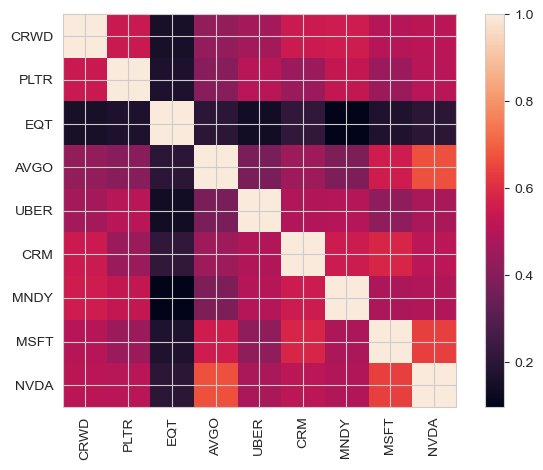

In [63]:
plotting.plot_covariance(S, plot_correlation=True)

Compute the prior estimate of returns implied by the market weights. In other words, given each asset's contribution to the risk of the market     portfolio, how much are we expecting to be compensated? This is the percentage return expected from each asset,

In [64]:
market_prior = black_litterman.market_implied_prior_returns(mcaps, delta, S)
market_prior

CRWD    0.334099
PLTR    0.403340
EQT     0.119686
AVGO    0.294807
UBER    0.280491
CRM     0.266729
MNDY    0.425763
MSFT    0.263967
NVDA    0.539407
dtype: float64

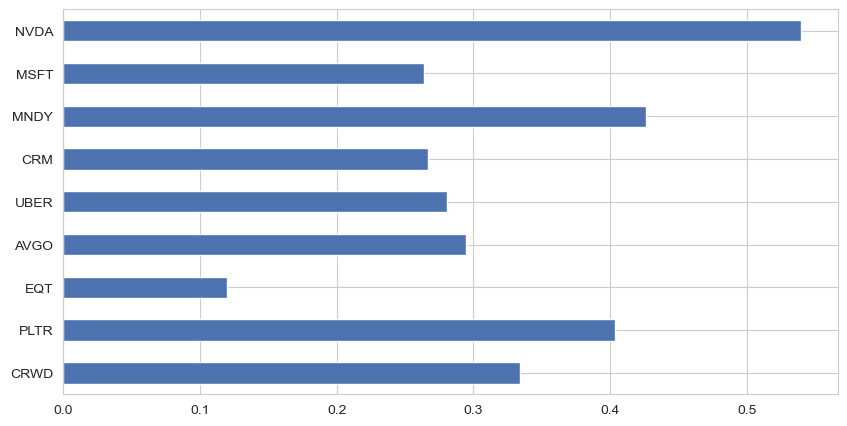

In [65]:
market_prior.plot.barh(figsize=(10,5));

Here you can set your expert point of view. If you estimate some assets will outperform or outerperform, you can express your expected drops or raises in range of [-1, 1]

In [67]:
# You don't have to provide views on all the assets
viewdict = {}

viewdict = {'CRWD': 0.01, 'PLTR': 0.01, 'EQT': 0.01, 'AVGO': 0.01, 'UBER': 0.01, 'CRM': 0.01, 'MNDY': 0.01, 'MSFT': 0.3, 'NVDA': 0.3}

bl = BlackLittermanModel(S, pi=market_prior, absolute_views=viewdict)

In [68]:
ret_bl = bl.bl_returns()
ret_bl

CRWD    0.091146
PLTR    0.102008
EQT     0.035601
AVGO    0.124957
UBER    0.072163
CRM     0.090395
MNDY    0.108185
MSFT    0.198730
NVDA    0.316337
dtype: float64

We can modify the behavior of the model by setting confidence on our point of view about the returns

In [69]:
##{'PYPL', 'CRWD', 'PATH': 0.01, 'PLTR': 0.01, 'ASAN': 0.01, 'EQT': 0.01, 'AVGO': 0.01, 'UBER': 0.01, 'CRM': 0.01, 'MNDY': 0.01, 'MSFT': 0.3, 'NVDA': 0.3}
confidences = [
    0.5, # confident for CRWD
    0.5, # confident for PLTR
    0.5, # confident for EQT
    0.5, # confident for AVGO
    0.5, # confident for UBER
    0.5, # confident for CRM
    0.5, # confident for MNDY
    0.8, # confident for MSFT
    0.8, # confident for NVDA
]

In [70]:
bl = BlackLittermanModel(S, pi=market_prior, absolute_views=viewdict, omega="idzorek", view_confidences=confidences)

Lets review the certainty matrix produced by our point of view and confidence.

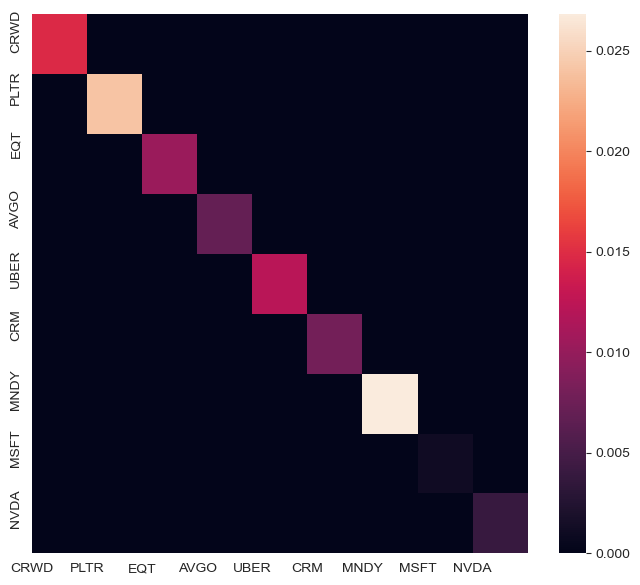

In [71]:
fig, ax = plt.subplots(figsize=(8,7))
im = sns.heatmap(bl.omega, fmt='.2f')

# We want to show all ticks...
ax.set_xticks(np.arange(len(bl.tickers)))
ax.set_yticks(np.arange(len(bl.tickers)))

ax.set_xticklabels(bl.tickers)
ax.set_yticklabels(bl.tickers)
plt.show()

In [72]:
np.diag(bl.omega)

array([0.01466981, 0.02405714, 0.01027624, 0.0069604 , 0.01217907,
       0.00785781, 0.02681059, 0.00106279, 0.00388113])

In [73]:
ret_bl = bl.bl_returns()
ret_bl

CRWD    0.103007
PLTR    0.110574
EQT     0.037476
AVGO    0.134535
UBER    0.077425
CRM     0.106137
MNDY    0.122458
MSFT    0.250645
NVDA    0.322170
dtype: float64

Do we need to set a single value of confidence in our point of views? NO! We can set the interval.

In [74]:
##{'PYPL', 'CRWD', 'PATH': 0.01, 'PLTR': 0.01, 'ASAN': 0.01, 'EQT': 0.01, 'AVGO': 0.01, 'UBER': 0.01, 'CRM': 0.01, 'MNDY': 0.01, 'MSFT': 0.3, 'NVDA': 0.3}
intervals = [
    (0.45, 0.55), # confident for CRWD
    (0.45, 0.55), # confident for PLTR
    (0.45, 0.55), # confident for EQT
    (0.45, 0.55), # confident for AVGO
    (0.45, 0.55), # confident for UBER
    (0.45, 0.55), # confident for CRM
    (0.45, 0.55), # confident for MNDY
    (0.7, 0.9), # confident for MSFT
    (0.7, 0.9) # confident for NVDA
]

In [75]:
variances = []
for lb, ub in intervals:
    sigma = (ub - lb)/2
    variances.append(sigma ** 2)

print(variances)
omega = np.diag(variances)

[0.002500000000000002, 0.002500000000000002, 0.002500000000000002, 0.002500000000000002, 0.002500000000000002, 0.002500000000000002, 0.002500000000000002, 0.010000000000000007, 0.010000000000000007]


In [76]:
# We are using the shortcut to automatically compute market-implied prior
bl = BlackLittermanModel(S, pi="market", market_caps=mcaps, risk_aversion=delta,
                        absolute_views=viewdict, omega=omega)

In [77]:
# Posterior estimate of returns
ret_bl = bl.bl_returns()
ret_bl

CRWD    0.024978
PLTR    0.022266
EQT     0.013723
AVGO    0.064521
UBER    0.021995
CRM     0.035977
MNDY    0.021551
MSFT    0.141632
NVDA    0.266255
dtype: float64

We can see the prior estimates, the posterior adjusted with the risk provided and the estimates with our point of view

In [78]:
rets_df = pd.DataFrame([market_prior, ret_bl, pd.Series(viewdict)], 
             index=["Prior", "Posterior", "Views"]).T
rets_df

,Prior,Posterior,Views
CRWD,0.334099,0.024978,0.01
PLTR,0.403340,0.022266,0.01
EQT,0.119686,0.013723,0.01
AVGO,0.294807,0.064521,0.01
UBER,0.280491,0.021995,0.01
CRM,0.266729,0.035977,0.01
MNDY,0.425763,0.021551,0.01
MSFT,0.263967,0.141632,0.30
NVDA,0.539407,0.266255,0.30


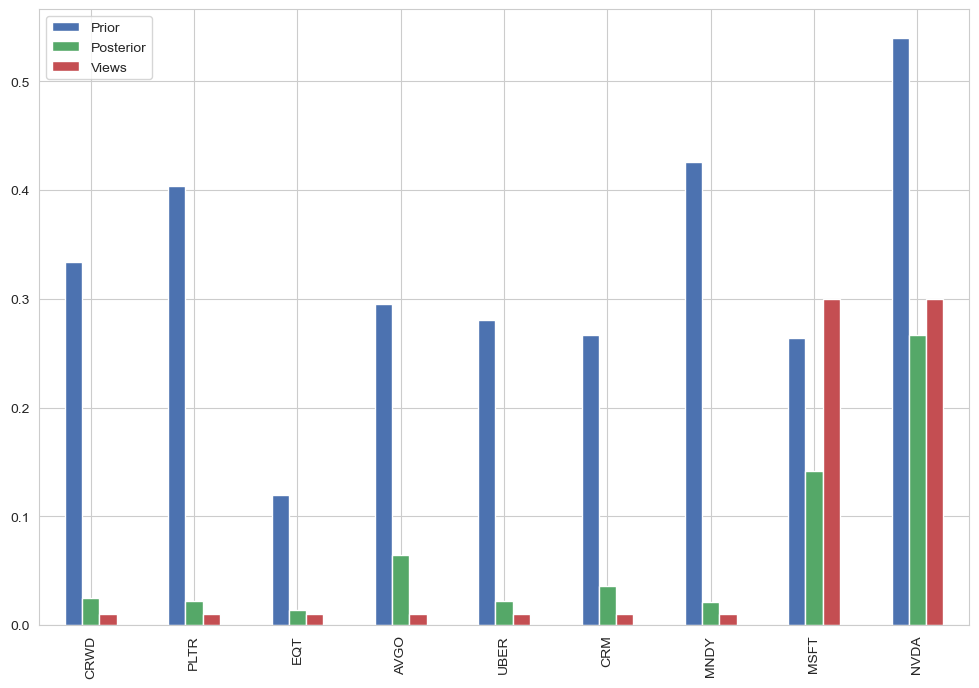

In [79]:
rets_df.plot.bar(figsize=(12,8));

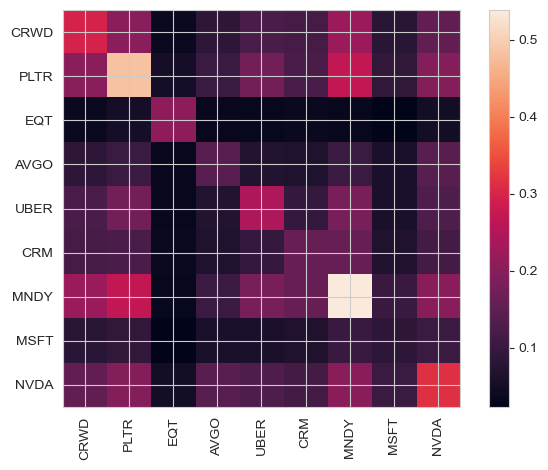

In [80]:
S_bl = bl.bl_cov()
plotting.plot_covariance(S_bl);

Lets calculate the efficient frontier of stock percentages

In [81]:
from pypfopt import EfficientFrontier, objective_functions

In [82]:
ef = EfficientFrontier(ret_bl, S_bl)
ef.add_objective(objective_functions.L2_reg)
ef.max_sharpe()
weights = ef.clean_weights()
weights

c:\Users\imedi\anaconda3\envs\DataPub202406\Lib\site-packages\pypfopt\efficient_frontier\efficient_frontier.py:259: UserWarning: max_sharpe transforms the optimization problem so additional objectives may not work as expected.
  warnings.warn(


OrderedDict([('CRWD', 0.0),
             ('PLTR', 0.0),
             ('EQT', 0.0),
             ('AVGO', 0.04196),
             ('UBER', 0.0),
             ('CRM', 0.0),
             ('MNDY', 0.0),
             ('MSFT', 0.33056),
             ('NVDA', 0.62748)])

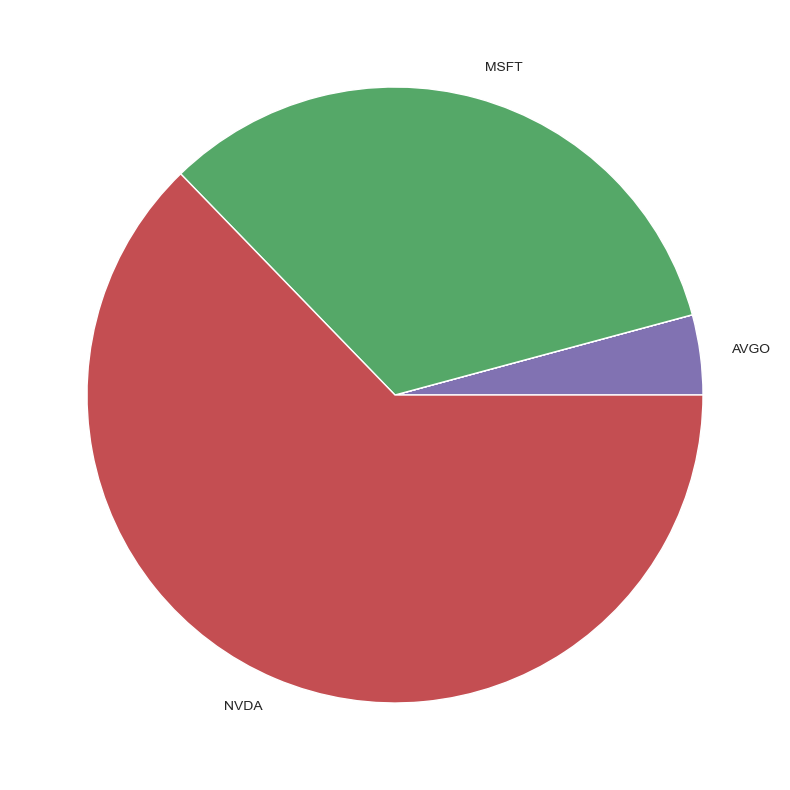

In [83]:
pd.Series(weights).plot.pie(figsize=(10,10));

How many titles should I buy?

In [84]:
from pypfopt import DiscreteAllocation

da = DiscreteAllocation(weights, stock_prices.iloc[-1], total_portfolio_value=20000)
alloc, leftover = da.lp_portfolio()
print(f"Leftover: ${leftover:.2f}")
alloc

Leftover: $0.93


{'AVGO': 5, 'MSFT': 16, 'NVDA': 110}

In [85]:
bl.omega

array([[0.0025, 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.    ],
       [0.    , 0.0025, 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.    ],
       [0.    , 0.    , 0.0025, 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.    ],
       [0.    , 0.    , 0.    , 0.0025, 0.    , 0.    , 0.    , 0.    ,
        0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.0025, 0.    , 0.    , 0.    ,
        0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.0025, 0.    , 0.    ,
        0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.0025, 0.    ,
        0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.01  ,
        0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.01  ]])

In [86]:
usd_investment_amount = mxn_investment_amount / mxn_to_usd_exchange_rate

mean_bl =  market_prices.pct_change().dropna().mean() 
stdev_bl =  market_prices.pct_change().dropna().std()
df_portfolio = weights


# Final report:
print(f'Black-Litterman Portfolio (MXN amount: {mxn_investment_amount}. USD amount: {usd_investment_amount}):')
print(f'   -Expected earns (daily): {mean_bl * 100:.2f}%.')
print(f'\tExpected amount (Yearly): ${usd_investment_amount*mean_bl*52*5:.2f}')
print(f'   -Variance: +/-{stdev_bl * 100:.2f}%')
print(f'\tExpected variance amount (Yearly): +/-${usd_investment_amount*stdev_bl*52*5:.2f}')
print('   -Portfolio composition:')
for symbol, percentage in sorted(weights.items(), key=lambda t: t[::-1], reverse=True):
    print(f'\tStock: {symbol}. \tPercentage: {percentage*100:.2f}%.\tAmount USD: ${percentage * usd_investment_amount:.2f}.\tAmount MXN: ${percentage * mxn_investment_amount:.2f}.')

Black-Litterman Portfolio (MXN amount: 23000.0. USD amount: 1299.4350282485875):
   -Expected earns (daily): 0.05%.
	Expected amount (Yearly): $155.23
   -Variance: +/-1.18%
	Expected variance amount (Yearly): +/-$3971.20
   -Portfolio composition:
	Stock: NVDA. 	Percentage: 62.75%.	Amount USD: $815.37.	Amount MXN: $14432.04.
	Stock: MSFT. 	Percentage: 33.06%.	Amount USD: $429.54.	Amount MXN: $7602.88.
	Stock: AVGO. 	Percentage: 4.20%.	Amount USD: $54.52.	Amount MXN: $965.08.
	Stock: UBER. 	Percentage: 0.00%.	Amount USD: $0.00.	Amount MXN: $0.00.
	Stock: PLTR. 	Percentage: 0.00%.	Amount USD: $0.00.	Amount MXN: $0.00.
	Stock: MNDY. 	Percentage: 0.00%.	Amount USD: $0.00.	Amount MXN: $0.00.
	Stock: EQT. 	Percentage: 0.00%.	Amount USD: $0.00.	Amount MXN: $0.00.
	Stock: CRWD. 	Percentage: 0.00%.	Amount USD: $0.00.	Amount MXN: $0.00.
	Stock: CRM. 	Percentage: 0.00%.	Amount USD: $0.00.	Amount MXN: $0.00.


## Conclusiones
Que mejor que un modelo de optimización de portafolios que 3 modelos. Ambos asumen propiedades de la distribución de los datos que no se cumplen pero que pueden ser una buena aproximación al modelo real de los datos. ¿Quieres jugar con las salidas de los modelos?, Adelante!, prueba diferentes listas de stocks e itera hasta tener tu portafolio ideal, el riesgo se reduce (en cierta forma, pero no se elimina) mientras que los retornos mejoran (pero yo no apostaría a que esto ocurre en el 100% de casos). 

# Referencias
* Kanungo, D. K. (2023). *Probabilistic Machine Learning for Finance and Investment: A Primer to Generative AI with Python*. O'Reilly. p. 339.
* Raposa (2022). *How to use Python and the Kelly Criterion to Optimize your Stock Portfolio*. Disponible en [https://raposa.trade/blog/how-to-use-python-and-the-kelly-criterion-to-optimize-your-stock-portfolio/]. Consultado el 20 de junio de 2024.